<a href="https://colab.research.google.com/github/WooJungE/About_data/blob/main/20230404.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

        Feature_1  Feature_2
record                      
0       11.492294 -10.236187
1        4.376245  -9.152790
2       -2.193675   3.212265
3       -2.976039   3.037043
4       -2.963703   2.336960


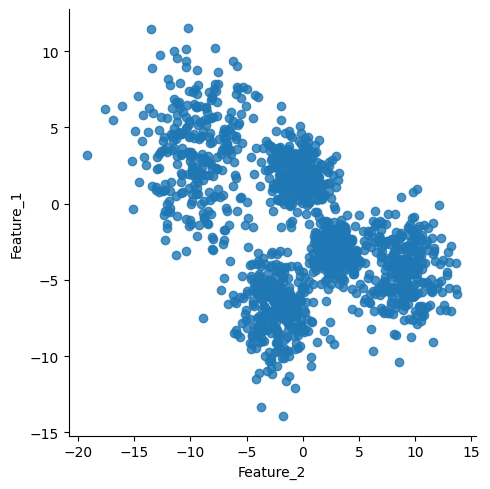

In [1]:
import seaborn as sns
import pandas as pd 
from sklearn import datasets

def make_blobs():
  n_samples = 1500
  blobs = datasets.make_blobs(n_samples=n_samples,
                              centers=5,
                              cluster_std=[3.0, 0.9, 1.9, 1.9, 1.3],
                              random_state=51)
  df = pd.DataFrame(blobs[0], columns=['Feature_1', 'Feature_2'])
  df.index.name = 'record'
  return df

df = make_blobs()
print(df.head())

sns.lmplot(x='Feature_2', y='Feature_1',
           data = df, fit_reg = False)

In [2]:
df = make_blobs()
from sklearn.cluster import KMeans
clus = KMeans(n_clusters=5, n_init='auto', tol=0.004, max_iter=300)
clus.fit(df)
df['K-means Cluster Labels'] = clus.labels_
print(df['K-means Cluster Labels'][:5].tolist())

df.head()

[1, 1, 0, 0, 0]


,Feature_1,Feature_2,K-means Cluster Labels
record,,,
0,11.492294,-10.236187,1
1,4.376245,-9.152790,1
2,-2.193675,3.212265,0
3,-2.976039,3.037043,0
4,-2.963703,2.336960,0


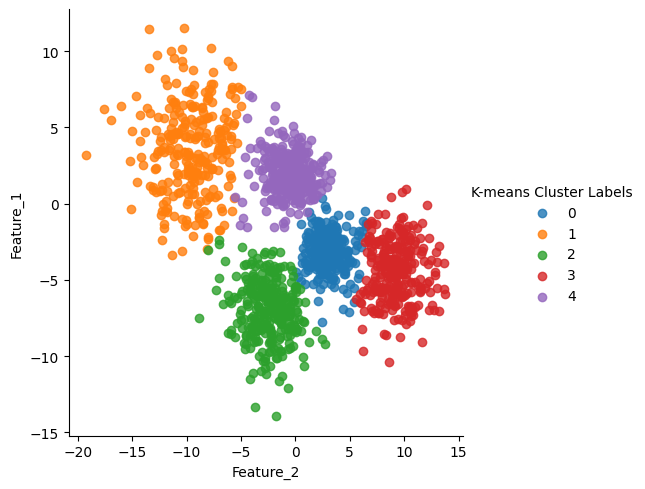

In [3]:
sns.lmplot(x='Feature_2', y='Feature_1',
           hue="K-means Cluster Labels", data=df, fit_reg=False)

In [7]:
df = make_blobs()

from sklearn import metrics

n_clusters = [2, 3, 4, 5, 6, 7, 8]

for k in n_clusters:
  kmeans = KMeans(n_clusters = k, random_state=42).fit(df)
  cluster_labels = kmeans.predict(df)
  S = metrics.silhouette_score(df, cluster_labels)
  print("n_clusters = {:d}, silhouette score {:f}".format(k, S))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


n_clusters = 2, silhouette score 0.442473


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


n_clusters = 3, silhouette score 0.442798


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


n_clusters = 4, silhouette score 0.513624


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


n_clusters = 5, silhouette score 0.547875


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


n_clusters = 6, silhouette score 0.524818
n_clusters = 7, silhouette score 0.523139


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


n_clusters = 8, silhouette score 0.486676


In [8]:
clus = KMeans(n_clusters=5, init='k-means++',
              tol=0.004, max_iter=300)

In [9]:
from sklearn.cluster import MiniBatchKMeans
clus = MiniBatchKMeans(n_clusters=5, batch_size=50,
                       tol=0.004, max_iter=300)

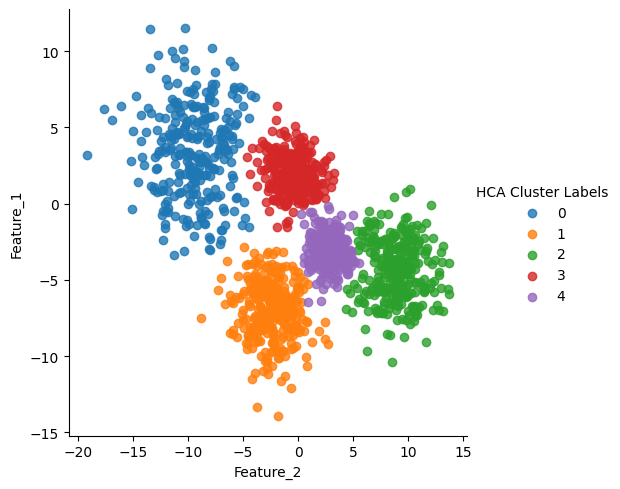

In [12]:
df = make_blobs()
from sklearn.cluster import AgglomerativeClustering
clus = AgglomerativeClustering(n_clusters=5,
                               metric='euclidean', linkage='ward')
clus.fit(df)
df['HCA Cluster Labels'] = clus.labels_
sns.lmplot(x='Feature_2', y='Feature_1',
           hue="HCA Cluster Labels", data=df, fit_reg=False)

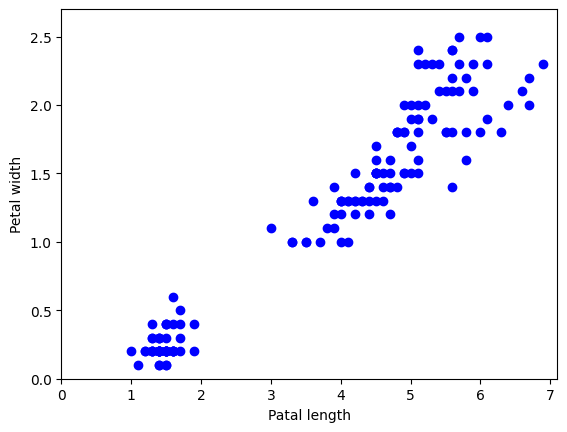

In [ ]:
from sklearn import cluster, datasets
import matplotlib.pyplot as plt
iris = datasets.load_iris()
X = iris.data[:, 2:]
y=iris.target
plt.xlabel('Patal length')
plt.ylabel('Petal width')
plt.axis([0, X[:, 0].max()+0.2, 0, X[:, 1].max()+0.2])
plt.plot(X[:,0], X[:, 1], 'bo')

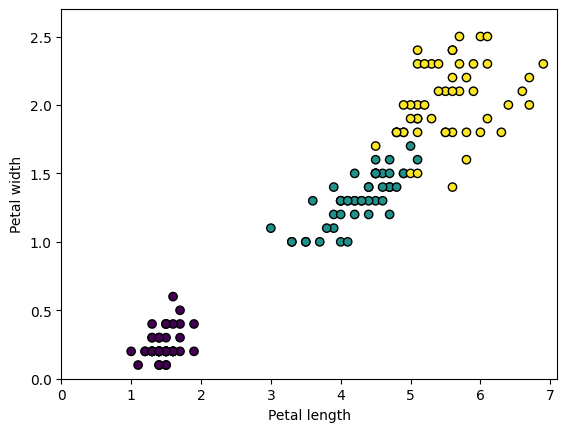

In [ ]:
plt.scatter(X[:,0], X[:,1],c=y, cmap='viridis', edgecolor='k')

plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.axis([0, X[:, 0].max()+0.2, 0, X[:, 1].max()+0.2])
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


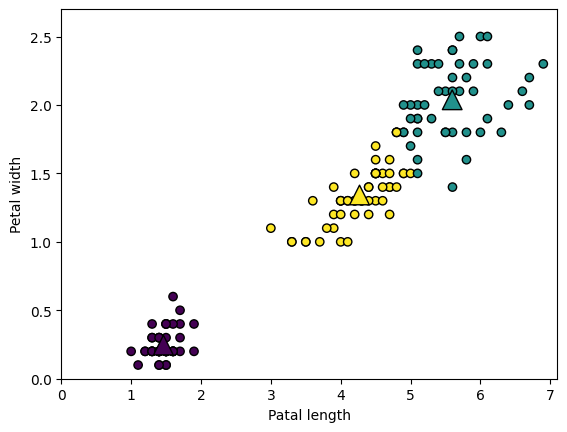

In [ ]:
from sklearn.cluster import KMeans
k_means = cluster.KMeans(n_clusters=3).fit(X)
y_pred=k_means.predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='viridis', edgecolor='k')
plt.xlabel('Patal length')
plt.ylabel('Petal width')
plt.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:,1], c=[0,1,2], cmap='viridis', marker='^', s=200, edgecolor='k')
plt.axis([0, X[:, 0].max()+0.2, 0, X[:, 1].max()+0.2])

plt.show()

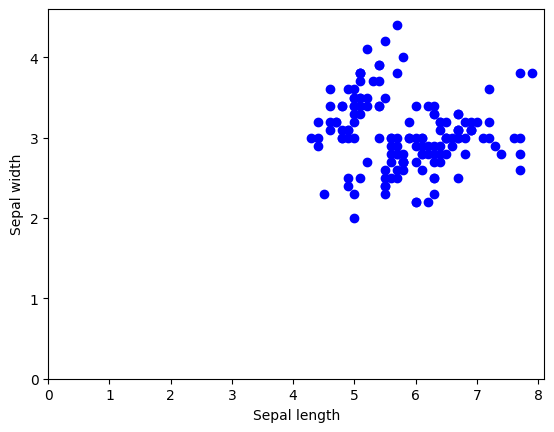

In [ ]:
from sklearn import cluster, datasets
import matplotlib.pyplot as plt
iris = datasets.load_iris()
X = iris.data[:, :2]
y=iris.target
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.axis([0, X[:, 0].max()+0.2, 0, X[:, 1].max()+0.2])
plt.plot(X[:,0], X[:, 1], 'bo')

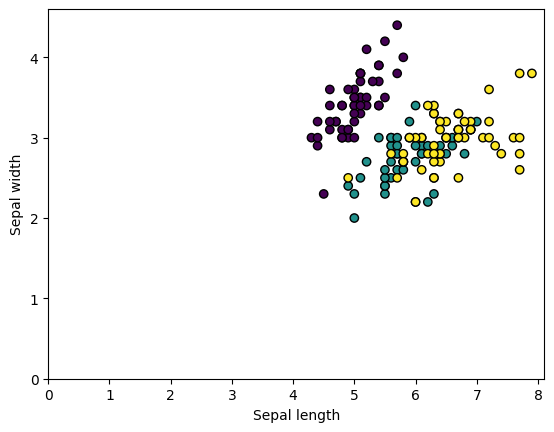

In [ ]:
plt.scatter(X[:,0], X[:,1],c=y, cmap='viridis', edgecolor='k')

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.axis([0, X[:, 0].max()+0.2, 0, X[:, 1].max()+0.2])
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


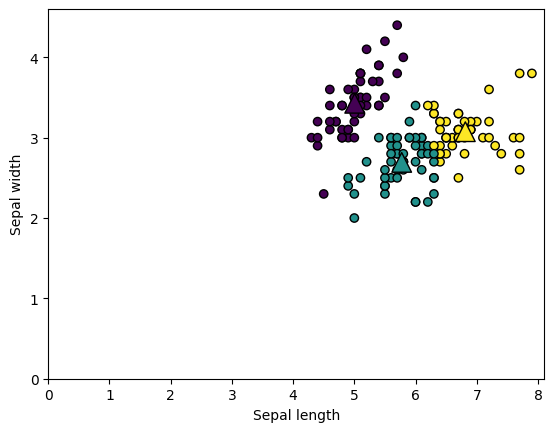

In [ ]:
from sklearn.cluster import KMeans
k_means = cluster.KMeans(n_clusters=3).fit(X)
y_pred=k_means.predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='viridis', edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:,1], c=[0,1,2], cmap='viridis', marker='^', s=200, edgecolor='k')
plt.axis([0, X[:, 0].max()+0.2, 0, X[:, 1].max()+0.2])

plt.show()